In [27]:
import pandas as pd

In [264]:
df = pd.read_csv('../models/game_prediction/home_win_away_win_draw_predictions.csv', parse_dates = ['Date'])

In [265]:
df_copy = df.copy()

In [266]:
# df = df[(df['Season'] == '2020-2021')]
# df

In [267]:

for col in df.columns:
    if col.startswith('Odds'):
        print(col)

OddsB365_Home
OddsBW_Home
OddsIW_Home
OddsPS_Home
OddsWH_Home
OddsVC_Home
OddsPSC_Home
OddsB365_Away
OddsBW_Away
OddsIW_Away
OddsPS_Away
OddsWH_Away
OddsVC_Away
OddsPSC_Away


2017-2018
886.4468840679223


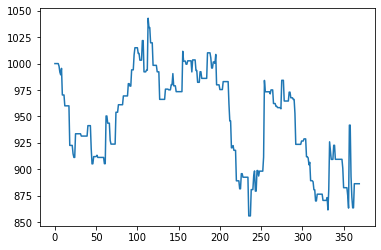

2018-2019
592.7764785441736


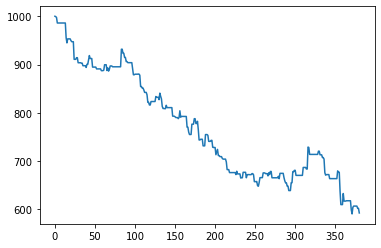

2019-2020
989.3205172428013


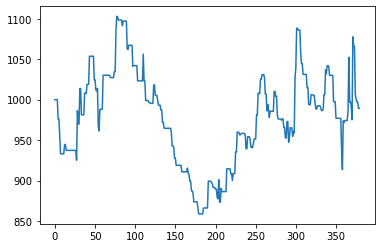

2020-2021
921.2416474436998


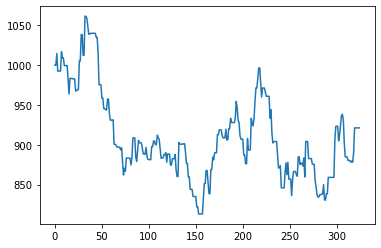

In [295]:
for season in df_copy['Season'].unique():
#     df = df_copy[(df_copy['Season'] == season) & (df_copy['League'] == 'Bundesliga')]
    df = df_copy[(df_copy['Season'] == season) & (df_copy['League'] == 'SerieA')]
    balance = 1000

    balances = [balance]
    i = 0
    for index, row in df.iterrows():
#         if i > len(df) / 4:
        budget = 0.2 * balance
        pred_prob_home = row['pred_prob_home_win']
        odds_home = row['OddsB365_Home']
        odds_away = row['OddsB365_Away']

#             print()

        spi_diff = row['FTESpi_Home'] - row['FTESpi_Away']
        win = (row['Goals_Home'] > row['Goals_Away'])
        frac = ((pred_prob_home * odds_home) - 1) / (odds_home - 1)
        outcome = 0

        if frac > 0 and (1/ pred_prob_home) < odds_home:
            bet_amount = frac * budget
            balance -= bet_amount
            if win:

                balance += (bet_amount * odds_home)

        balances.append(balance)

        i += 1
    
    print(season)
    print(balance)
    plt.plot(range(len(balances)), balances)
    plt.show()
    

In [279]:
import matplotlib.pyplot as plt

